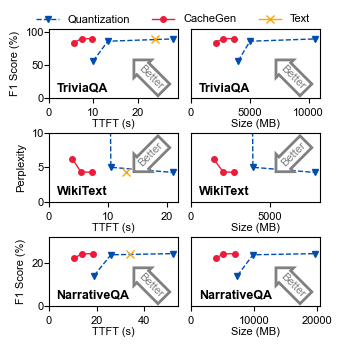

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]

def plot(csv, ax, title, xlabel, type, ylabel,
         need_y_label=False, need_legend=-1):

     data = json.load(open(csv))
     ax.plot(data[f'quant_{type}'], data['quant_quality'], c=BETTER_BASELINE_COLOR, marker="v",  label="Quantization", ls="--")
     ax.plot(data[f'cachegen_{type}'], data[f'cachegen_quality'], marker="o", c=SYS_COLOR, label="CacheGen")

     if type == "ttft":
          ax.plot(data[f'text_{type}'], data[f'text_quality'], marker="x", c="orange", label="Text", markersize=6)

     ax.set_xlim(left=0)
     ylims = {
          "tqa.json": (0, 105),
          "nqa.json": (0, 32),
          "wikitext.json": (0, 10)
     }
     ax.set_ylim(ylims[csv])
     ax.set_ylabel(ylabel)

     if not need_y_label:
          ax.set_yticks([])
          ax.set_ylabel("")


     if need_legend >= 0:
          ax.legend(loc="upper right", frameon=False,
                    bbox_to_anchor=[2.1, 1.35], ncol=3)
     if csv == "wikitext.json":
          ax.text(0.06, 0.1, title, c='black',
               transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
     else:
          ax.text(0.06, 0.1, title, c='black',
               transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
     ax.set_xlabel(xlabel, labelpad=1)
     ax.tick_params(axis="y", which="major", pad=0)



###########################################################

fig, axes = plt.subplots(3, 2, figsize=(3.5, 3.6))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

cur_type = "size"

plot('tqa.json', axes[0][1], "TriviaQA", "Size (MB)",
     type=cur_type,
     ylabel="F1 Score (%)",
     need_y_label=False)
plot('wikitext.json', axes[1][1], "WikiText", "Size (MB)", 
     ylabel="Perplexity",
     type=cur_type,
     need_y_label=False)
plot('nqa.json', axes[2][1], "NarrativeQA", "Size (MB)", type=cur_type,
     ylabel="F1 Score (%)",
     need_y_label=False)

cur_type = "ttft"

plot('tqa.json', axes[0][0], "TriviaQA", "TTFT (s)", type=cur_type,
     ylabel="F1 Score (%)", need_y_label=True,
     need_legend=True,
     )
plot('wikitext.json', axes[1][0], "WikiText", "TTFT (s)", 
     type=cur_type,
     ylabel="Perplexity",
     need_y_label=True
     )
plot('nqa.json', axes[2][0], "NarrativeQA", "TTFT (s)", type=cur_type, 
     ylabel="F1 Score (%)",
     need_y_label=True
     )

for ax in axes[0]:
     bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
     t = ax.text(0.9, 0.1, "Better", ha="right", 
               va="bottom", rotation=-45, bbox=bbox_props, 
               c='grey',
               transform=ax.transAxes)

for ax in axes[1]:
     bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
     t = ax.text(0.9, 0.48, "Better", ha="right", 
               va="bottom", rotation=45, bbox=bbox_props, c='grey',
               transform=ax.transAxes)

for ax in axes[2]:
     bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
     t = ax.text(0.9, 0.1, "Better", ha="right", 
               va="bottom", rotation=-45, bbox=bbox_props, 
               c='grey',
               transform=ax.transAxes)
fig.savefig("fig-e2e-70b.pdf", bbox_inches="tight", transparent=True)